In [1]:
# 引用需要的library
import numpy as np
import helper
import joblib
import os
import jieba
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import plot_tree

In [2]:
import numpy as np
from scipy.sparse import csr_matrix

# 示例列表
data = [[1, 0, 2],
        [0, 3, 0],
        [4, 0, 5]]

# 将列表转换为 CSR 格式的稀疏矩阵
sparse_matrix = csr_matrix(data)

nparray = sparse_matrix.toarray()

# 打印稀疏矩阵
print(nparray)

x = [0] * 10
print(x)

[[1 0 2]
 [0 3 0]
 [4 0 5]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [3]:
# 从文本文件中读数据
# 读取到的内容
# X=评论（string）， y=情感分类（0/1）
X = []
y = []
folder_path = './user_comments'  # 请将此处替换为您的文件夹路径
stop_words_path = './stop_words.txt'
# 文本向量化
vectorizers = [CountVectorizer(), TfidfVectorizer(), helper.OneHotVectorizer()]
for vectorizer in vectorizers:
    i, j = helper.Read_comments_from_file(folder_path=folder_path, vectorizer=vectorizer, stop_words_path=stop_words_path)
    X.append(i)
    y.append(j)
# X=稀疏矩阵（int），y=情感分类（0/1）

print(X[0].shape, y[0].shape)
print(X[1].shape, y[1].shape)
print(X[2].shape, y[2].shape)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/d6/mm5k9h3n5_924kj876nnys4w0000gn/T/jieba.cache
Loading model cost 0.312 seconds.
Prefix dict has been built successfully.


(5999, 20494) (5999,)
(5999, 20494) (5999,)
(5999, 22251) (5999,)


In [4]:
# 产生Dataset对象list
data_sets = []
data_sets.append(helper.DataSet(X=X[0], y=y[0], vectorizer="Counter"))
data_sets.append(helper.DataSet(X=X[1], y=y[1], vectorizer="Tfidf"))
data_sets.append(helper.DataSet(X=X[2], y=y[2], vectorizer="OneHot"))


all_classification_models = helper.Make_model_classifier()
# 构建预测模型列表
my_classification_models = []
for data_set in data_sets:
    for model in all_classification_models:
        my_classification_models.append(helper.PredictModel(model, data_set))


# 训练 & 预测
for model in my_classification_models:
    model.fit()
    model.predict()
    # 打印预测结果
    print(f"({model.model_name},{model.classification_data.vectorizer})({model.X_train_pre.shape[0]}), {model.train_duration}, {model.pred_duration}, {model.get_eval()}")
    model.save()

print("执行结束!!!")

(KNeighborsClassifier,Counter)(4799), 1.46, 1.44, 0.6066666666666667
(DecisionTreeClassifier,Counter)(4799), 8.01, 0.39, 0.825
(SVC,Counter)(4799), 232.75, 81.62, 0.6833333333333333
(RandomForestClassifier,Counter)(4799), 14.56, 0.51, 0.8775
(AdaBoostClassifier,Counter)(4799), 37.23, 1.2, 0.7875
(GradientBoostingClassifier,Counter)(4799), 149.96, 0.43, 0.7958333333333333
(XGBClassifier,Counter)(4799), 39.72, 0.11, 0.8416666666666667
(LGBMClassifier,Counter)(4799), 4.02, 0.1, 0.8541666666666666
(KNeighborsClassifier,Tfidf)(4799), 2.71, 1.73, 0.53
(DecisionTreeClassifier,Tfidf)(4799), 8.77, 0.6, 0.8266666666666667
(SVC,Tfidf)(4799), 233.84, 80.7, 0.7233333333333334
(RandomForestClassifier,Tfidf)(4799), 15.95, 0.69, 0.8725
(AdaBoostClassifier,Tfidf)(4799), 39.36, 1.44, 0.7825
(GradientBoostingClassifier,Tfidf)(4799), 148.84, 0.65, 0.8041666666666667
(XGBClassifier,Tfidf)(4799), 37.15, 0.13, 0.8441666666666666
(LGBMClassifier,Tfidf)(4799), 5.25, 0.13, 0.845
(KNeighborsClassifier,OneHot)(47

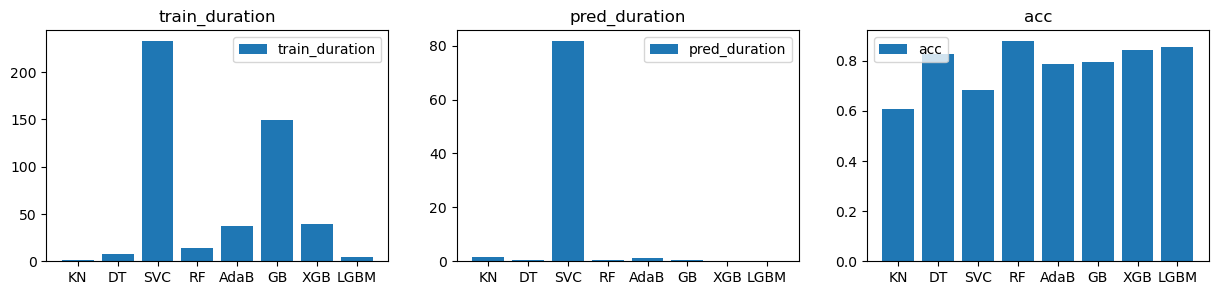

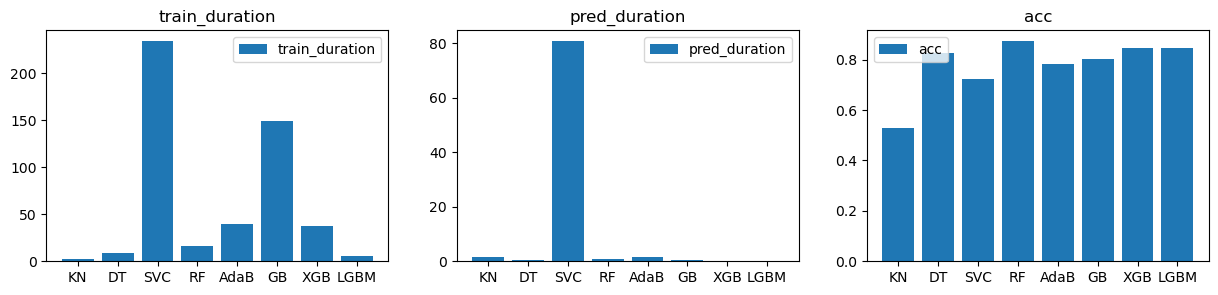

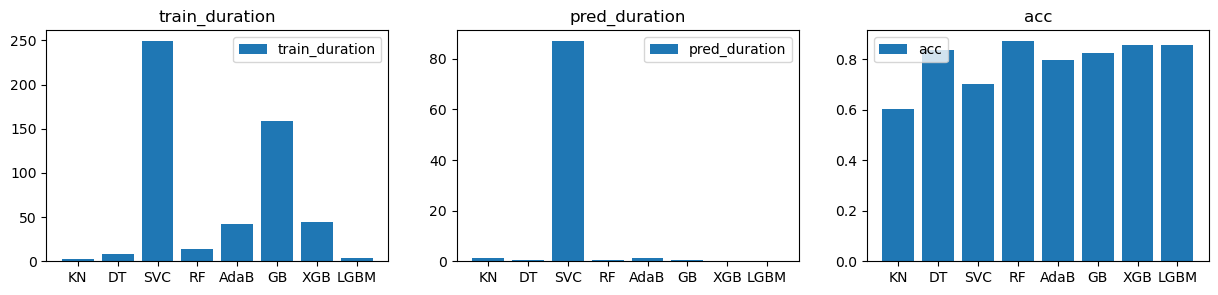

In [5]:
# 柱状图，能够一眼看出各数据的大小，比较数据之间的差别
# 打印CountVectorizer的效果对比
result_data = helper.Result_analysis(my_classification_models[:8])
helper.Plot_analysis(result_data)

# 打印TfidfVectorizer的效果对比
result_data = helper.Result_analysis(my_classification_models[8:16])
helper.Plot_analysis(result_data)

# 打印OneHot的效果对比
result_data = helper.Result_analysis(my_classification_models[16:24])
helper.Plot_analysis(result_data)

In [6]:
# TODO
# 1. 实现TF-IDF - done
# 2. 实现one-hot - done
# 3. 对稀疏矩阵的数据预处理：标准化/归一化？PCA降维？
# 4. 优化图表显示：显示中文？
# 5. 优化调用文本向量化的算法的方式 - done
# 6. 过滤掉停用词（传参数给jieba），需要找到合适的停用词列表 - 停用词逻辑已加入
# 7. jieba能不能接受专用词列表？
# 8. 英文字符串问题，修改去掉空格的方式？
# 9. 怎么判断是否过拟合？
# 10. 怎样优化训练策略和推理策略